<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L04/CCP_feasibility_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title Tutorial CCP - feasibility set
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm



# Chance-Constrained Optimization Problem

## Problem Description

We aim to solve the following **Chance-Constrained Program (CCP)**:

$$
\min_{a \in \mathcal{A}} \left\{ a1 + 2a2 : \mathbb{P}[g_1 \leq 0 \text{ and } g_2 \leq 0] \geq 1 - \alpha \right\}
$$

**Design Space**
$$
\mathcal{A} = \{a \in \mathbb{R}^2 : a_1 \in [-5, 5], a_2 \in [-5, 5]\}
$$

**Constraint functions**
- $ g_1(a, u) = (1-a_1)u_1 + a_2 u_2 \leq 0$
- $ g_2(a, u) = (1-a_2)u_2 + a_1 u_1 \leq 0$


Note that these constraints are linear constraints and we can therefore write the two inequality constraints $g_1\leq 0$ and $g_2 \leq 0$ as follows:


 $\begin{bmatrix} (1-a_1) & a_2 \\ (1-a_2) & a_1 \end{bmatrix} \begin{bmatrix} u_1\\ u_2 \end{bmatrix} \leq 0$


This is equivalent to the more compact linear inequality $ Au \leq 0$, where


 $A = \begin{bmatrix} (1-a_1) & a_2 \\ (1-a_2) & a_1 \end{bmatrix}$

 and

 $u = \begin{bmatrix} u_1\\ u_2 \end{bmatrix} $



**Uncertainty**  

We known that our uncertain parameters $ (u_1, u_2) $ follow a **joint normal distribution**:

$$
(u_1, u_2) \sim \mathcal{N}(\mu, \Sigma)
$$

where:
- $\mu = [0, 1]$ and $ \Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 4 \end{bmatrix} $


Based on this information

For vaious levels $\alpha$, visualize the feasibility set for the individual constraints:
  1. $\mathbb{P}[g_1 \leq 0 ] \geq 1 - \alpha$ and,   
  2. $\mathbb{P}[ g_2 \leq 0] \geq 1 - \alpha$

For vaious levels $\alpha$, visualize the feasibility set for the joint constraint:  
  3. $\mathbb{P}[g_1 \leq 0 \text{ and } g_2 \leq 0] \geq 1 - \alpha$

In [5]:
#@title First, let us define our problem parameters
a1_min, a1_max = -5, 5
a2_min, a2_max = -5, 5

mu = np.array([0, 1])  # Mean vector
Sigma = np.array([[1, 0.5], [0.5, 4]])  # Covariance matrix (variances on the diagonal and covariances on the off-diagonal)


In [20]:
# And now we will have a better look at our uncertainty model:

# the function norm is used to define the marginal distributions of u1 and u2 as follows:

pdf_u1_marginal = norm(loc=0 ,scale=1 )
pdf_u2_marginal = norm(loc=1 ,scale=np.sqrt(4) )

# multivariate_normal is used to define the joint distributions of u1 and u2 as follows:
pdf_u1u2_joint = multivariate_normal(mean=mu, cov=Sigma)

(-10.0, 10.0)

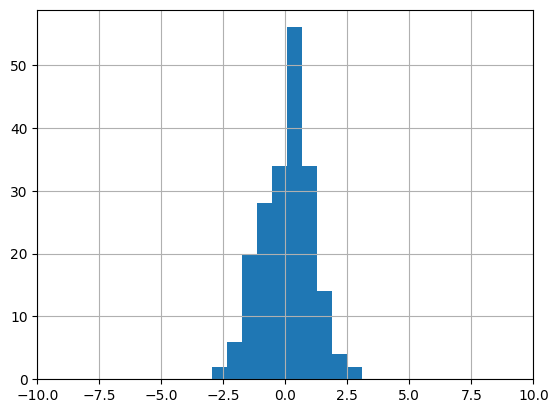

In [57]:
# generate some random samples  and see how the distributions look like
synthetic_samples_u1 = pdf_u1_marginal.rvs(size=200)   # generate some random samples for u1

plt.hist(synthetic_samples_u1) # visualize
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]


(-10.0, 10.0)

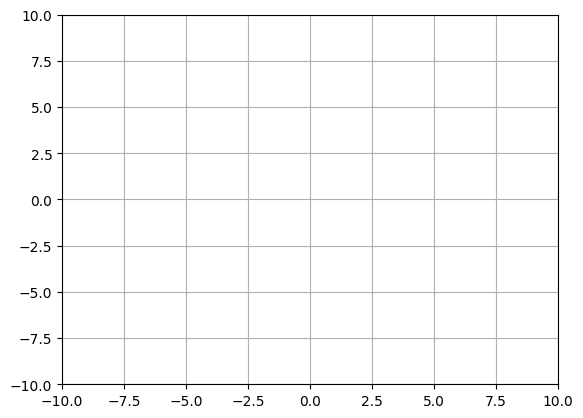

In [58]:

# COMPLETE ------- sample both u1 and u2 and how the scatter plot
samplesu1 = []
samplesu2 = []
plt.scatter(samplesu1, samplesu2) # visualize
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.ylim([-10,10])

(-10.0, 10.0)

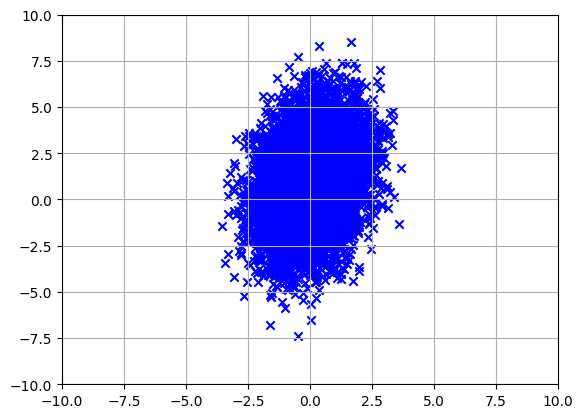

In [41]:
synthetic_samples = pdf_u1u2_joint.rvs(size=10000)  # generate random samples
plt.scatter(synthetic_samples[:,0], synthetic_samples[:,1],  marker='x', c='r')
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.ylim([-10,10])

(-10.0, 10.0)

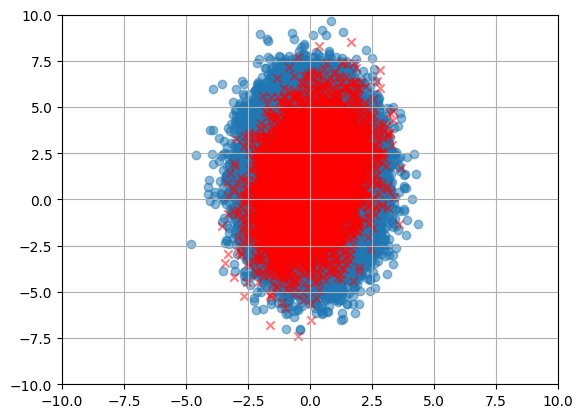

In [44]:

plt.scatter(samplesu1, samplesu2, alpha=0.5) # visualize  the marginal samples
plt.scatter(synthetic_samples[:,0], synthetic_samples[:,1],  marker='x', c='r', alpha=0.5)  # visualize the samples from the joint distribution
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.ylim([-10,10])

In [54]:
#@title les us start with an example of transformation

# assume we are trying to explre how good is the decision:
a1 = 2
a2 = 2

# we can then compute the matrix of coefficients
A = np.array([[1 - a1, a2], [a1, 1 - a2]])  # The matrix of coefficients is the one defining our inequalities g1<=0 and g2<=0

print('...')
print('A=', A)
print('...')

# A nice results from the theory is that if we have Ax with x gaussian distributed then Ax is also gaussina
# Ax ~ multivariate gaussian with mean value scaled by (A) and covariance (Acov(X)A^T)


# let see how this look
mu_transformed = A @ mu  # Mean transformation ( this is the mean value of Ax, remember this A was defined by a1=2 and a2 =2)

print('...')
print('mean vaector transformed=',mu_transformed)
print('...')

Sigma_transformed = A @ Sigma @ A.T  # Covariance transformation ( this is the covariance matrix for Ax)

print('...')
print('Covariance transformed=',Sigma_transformed)
print('...')

# we can also compute the standard deviations of the transformed Ax,
# remember the diagonal of the covariance are variances, so we can do take the diagonal and square root  variance = (standard deviation)**2

std_transformed = [] # complete....take the diagonal and square root of the transformed covariance matrix
print('...')
print('standard deviation transformed=',std_transformed)
print('...')

...
A= [[-1  2]
 [ 2 -1]]
...
...
mean vaector transformed= [ 2 -1]
...
...
Covariance transformed= [[15.  -7.5]
 [-7.5  6. ]]
...
...
standard deviation transformed= [3.87298335 2.44948974]
...


In [65]:
# say we are interested in the probability level alpha =0.7 and for the value a1= 1 and a2= 4
a1 = 1
a2 = 4
alpha=0.9


"""  Remeber that we know that Ax is a joint gaussian."""

# multivariate_normal is used to define the joint distributions :

""" the transofrmation shown before to input the mean and covariance transformed"""

# pdf_g1g2_joint = multivariate_normal(mean=[], cov=[])


# How can we solve Prob[Ax<=0] > 0.1? Ax is Gaussian....we know the parameters


"""  Hence we know that Prob[Ax<=0] is the definition of CDF for Ax=0 """

# COMPLETE ..... get the probability Prob[Ax<=0]
# use the bulit in function multivariate_normal.cdf


probability = 0 # replace as appropriate


# Verify weather Prob[Ax<=0] > 0.1


is_feasible = probability >= 1-alpha





# Now we know how to check feasibility for one candidate a1 and a2....

lets try to repeat the analysis for many $(a1,a2)$ within the set
and for different levels $\alpha$

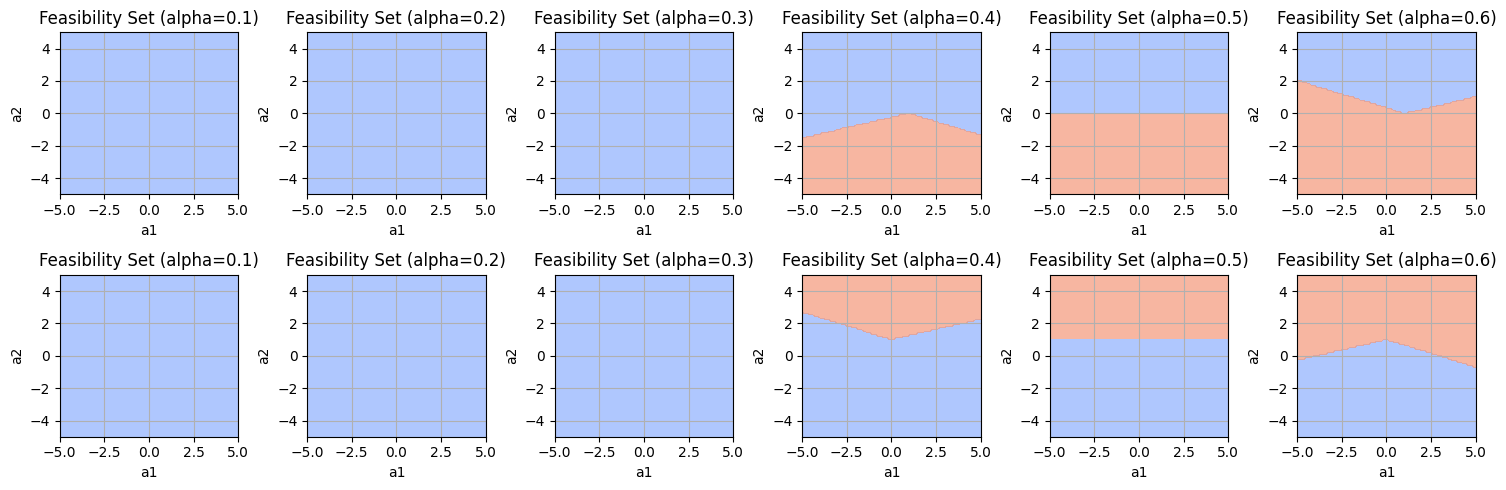

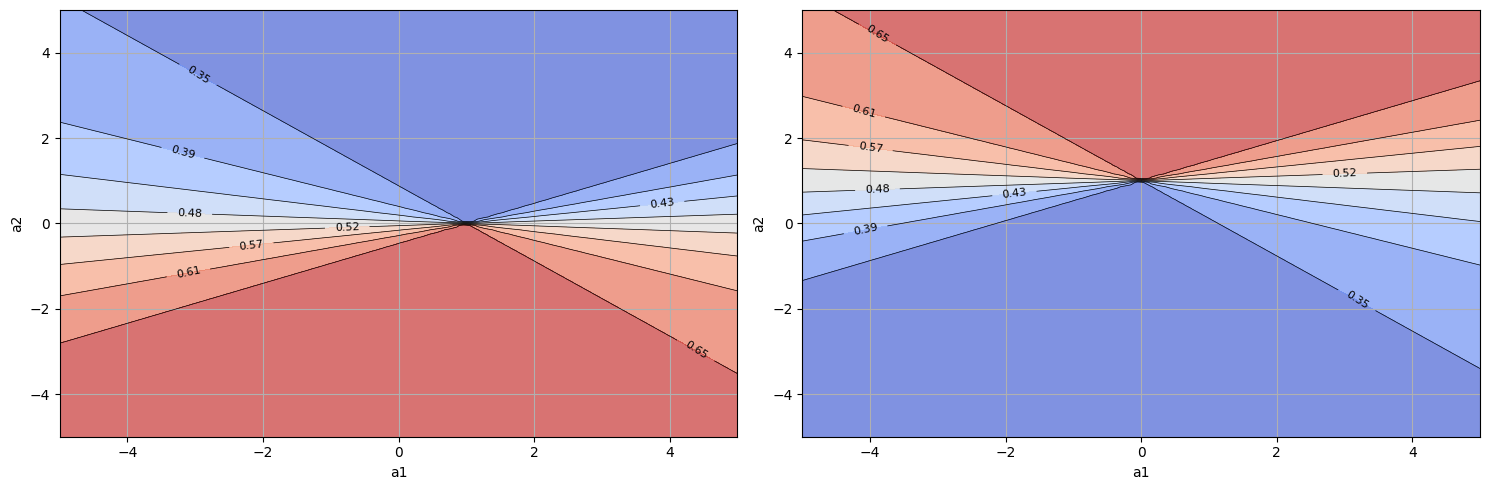

In [66]:
# Define grid for (a1, a2)
a1_vals = np.linspace(-5, 5, 100)
a2_vals = np.linspace(-5, 5, 100)
A1, A2 = np.meshgrid(a1_vals, a2_vals)

# Function to compute probability P(g1 <= 0, g2 <= 0)
def compute_probability_marginal(a1, a2):
    A = np.array([[1 - a1, a2], [a1, 1 - a2]])  # Transformation matrix
    mu_transformed = A @ mu  # Mean transformation
    Sigma_transformed = A @ Sigma @ A.T  # Covariance transformation
    scale_vals = np.sqrt(np.diag(Sigma_transformed))

    # Compute probability using marginal
    prob_g1 = norm.cdf(0, loc=mu_transformed[0], scale= scale_vals[0])
    prob_g2 = norm.cdf(0, loc=mu_transformed[1], scale= scale_vals[1])
    return prob_g1, prob_g2


# Define constraint probabilities
alpha_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Compute feasibility for each alpha level
fig, axes = plt.subplots(2, len(alpha_levels), figsize=(15, 5))
for i, alpha in enumerate(alpha_levels):
    feasibility_g1 = np.zeros_like(A1)
    probability_g1 = np.zeros_like(A1)
    feasibility_g2 = np.zeros_like(A1)
    probability_g2 = np.zeros_like(A1)

    for x in range(A1.shape[0]):
        for y in range(A1.shape[1]):
            prob_g1, prob_g2 = compute_probability_marginal(A1[x, y], A2[x, y])
            feasibility_g1[x, y] = prob_g1 >= 1 - alpha  # save feasibility (indicator function)
            feasibility_g2[x, y] = prob_g2 >= 1 - alpha

            probability_g1[x, y] = prob_g1  # save probabilities
            probability_g2[x, y] = prob_g2

    # Plot feasibility region
    contour = axes[0,i].contourf(A1, A2, feasibility_g1, levels=1, cmap='coolwarm', alpha=0.7)
    axes[0,i].set_title(f'Feasibility Set (alpha={alpha})')
    axes[0,i].set_xlabel('a1')
    axes[0,i].set_ylabel('a2')
    axes[0,i].grid(True)

    contour = axes[1,i].contourf(A1, A2, feasibility_g2, levels=1, cmap='coolwarm', alpha=0.7)
    axes[1,i].set_title(f'Feasibility Set (alpha={alpha})')
    axes[1,i].set_xlabel('a1')
    axes[1,i].set_ylabel('a2')
    axes[1,i].grid(True)

plt.tight_layout()
plt.show()


# Plot feasibility region
levels = np.linspace(np.min(probability_g1),np.max(probability_g1),10)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
contour_filled = axes[0].contourf(A1, A2, probability_g1, levels=levels, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = axes[0].contour(A1, A2, probability_g1, levels=levels, colors='k', linewidths=0.5)# Add contour lines
axes[0].clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')
axes[0].grid(True)

levels = np.linspace(np.min(probability_g2),np.max(probability_g2),10)
contour_filled = axes[1].contourf(A1, A2, probability_g2, levels=levels, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = axes[1].contour(A1, A2, probability_g2, levels=levels, colors='k', linewidths=0.5)# Add contour lines
axes[1].clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a2')
axes[1].grid(True)

plt.tight_layout()
plt.show()





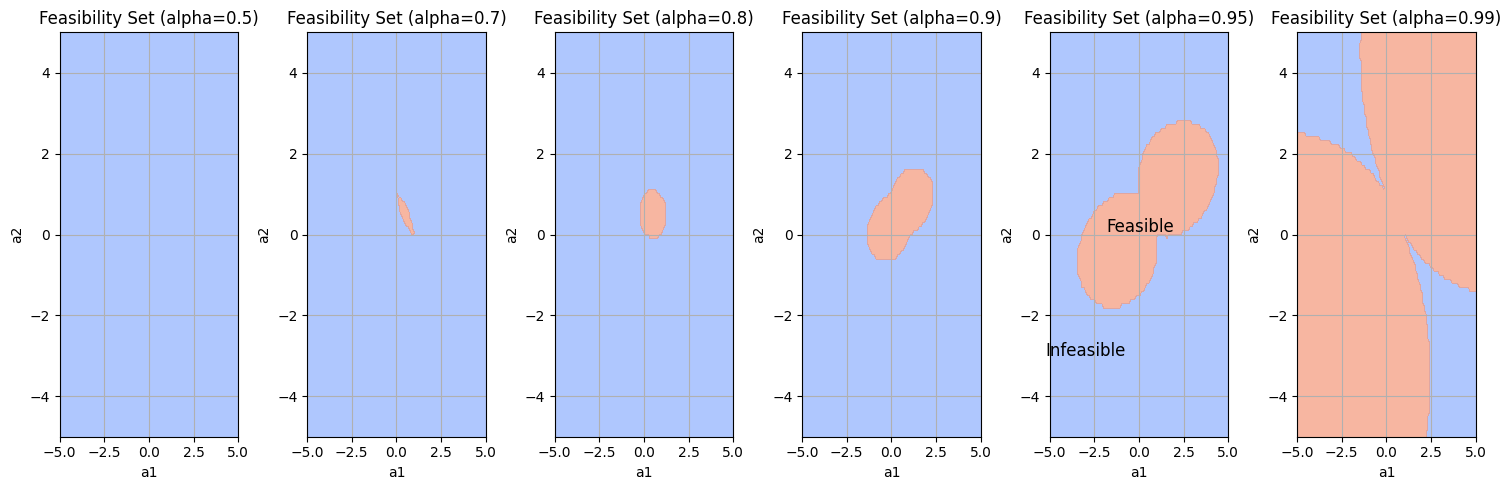

In [67]:
# Function to compute probability P(g1 <= 0, g2 <= 0)
def compute_probability_jointly(a1, a2):
    A = np.array([[1 - a1, a2], [a1, 1 - a2]])  # Transformation matrix
    mu_transformed = A @ mu  # Mean transformation
    Sigma_transformed = A @ Sigma @ A.T  # Covariance transformation

    # Compute probability using bivariate normal CDF
    prob = multivariate_normal.cdf([0, 0], mean=mu_transformed, cov=Sigma_transformed)
    return prob

# Compute feasibility for each alpha level
alpha_levels = [0.5, 0.7, 0.8, 0.9, 0.95, 0.99]

fig, axes = plt.subplots(1, len(alpha_levels), figsize=(15, 5))
for i, alpha in enumerate(alpha_levels):
    feasibility = np.zeros_like(A1)
    probability = np.zeros_like(A1)

    for x in range(A1.shape[0]):
        for y in range(A1.shape[1]):
            prob = compute_probability_jointly(A1[x, y], A2[x, y])
            feasibility[x, y] = prob >= 1 - alpha  # save feasibility
            probability[x, y] = prob  # save probabilities

    # Plot feasibility region
    contour = axes[i].contourf(A1, A2, feasibility, levels=1, cmap='coolwarm', alpha=0.7)
    axes[i].set_title(f'Feasibility Set (alpha={alpha})')
    axes[i].set_xlabel('a1')
    axes[i].set_ylabel('a2')
    axes[i].grid(True)

    # Add labels for feasible and infeasible regions
    if i == len(alpha_levels) - 2:  # Only for the second last subplot

      mid_x, mid_y = A1.shape[0] // 2, A1.shape[1] // 2
      axes[i].text(A1[mid_x, mid_y], A2[mid_x, mid_y], "Feasible", fontsize=12, color='black', ha='center')
      axes[i].text(-3, -3, "Infeasible", fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()



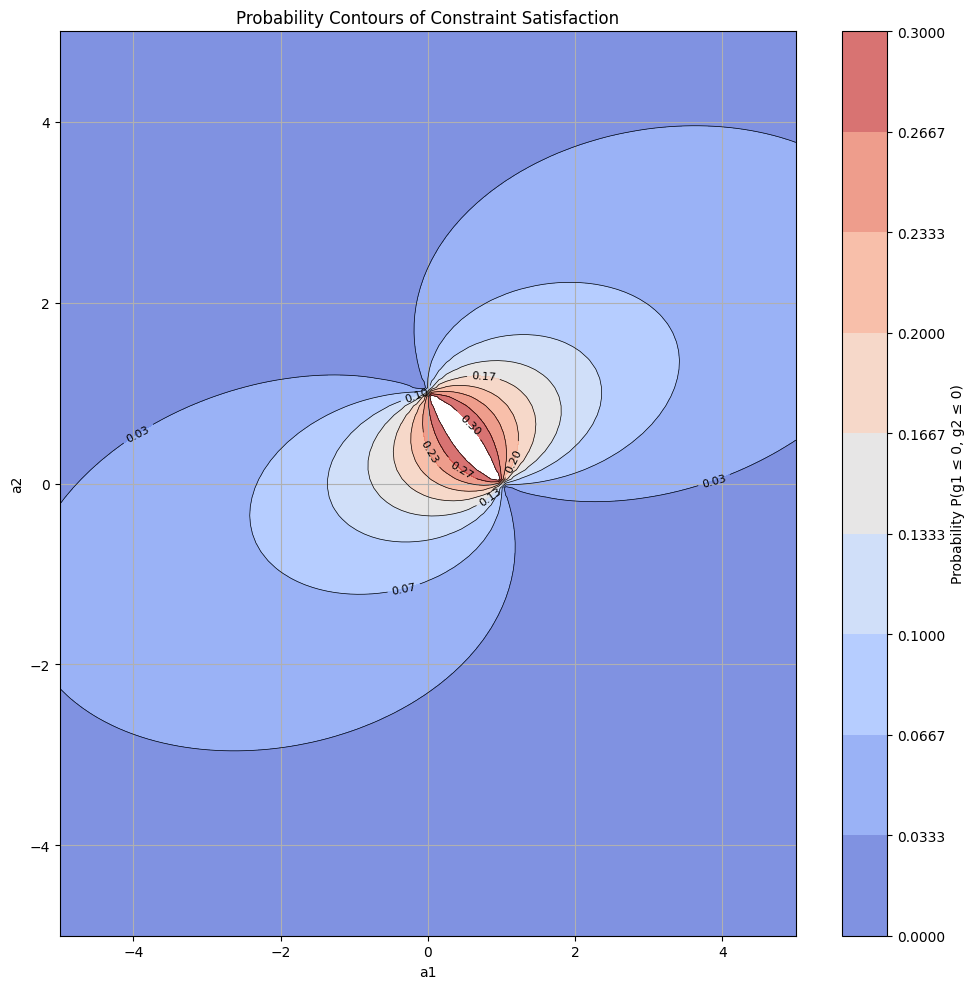

In [ ]:
plt.figure(figsize=(10, 10))
# Define contour levels
levels = np.linspace(0, .3, 10)  # Adjust granularity if needed
contour_filled = plt.contourf(A1, A2, probability, levels=levels, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = plt.contour(A1, A2, probability, levels=levels, colors='k', linewidths=0.5)# Add contour lines
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines

# Add colorbar
cbar = plt.colorbar(contour_filled)
cbar.set_label('Probability P(g1 ≤ 0, g2 ≤ 0)')

# Labels and grid
plt.xlabel('a1')
plt.ylabel('a2')
plt.title('Probability Contours of Constraint Satisfaction')
plt.grid(True)

plt.tight_layout()
plt.show()